# The Assumptions Of Linear Regression, And How To Test Them


# Assumption 1: Linear functional form


## y = β*X + ϵ

In [ ]:
import pandas as pd
from patsy import dmatrices
from matplotlib import pyplot as plt
import numpy as np
 

In [ ]:
df = pd.read_csv('PowerPlant.csv')
df.head()

In [ ]:
df.plot.scatter(x='Ambient_Temperature', y='Power_Output')
plt.xlabel('Ambient_Temperature', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

In [ ]:
df.plot.scatter(x='Volume', y='Power_Output')
plt.xlabel('Volume', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

In [ ]:
df.plot.scatter(x='Ambient_Pressure', y='Power_Output')
plt.xlabel('Ambient_Pressure', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

In [ ]:
df.plot.scatter(x='Relative_Humidity', y='Power_Output')
plt.xlabel('Relative_Humidity', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

In [ ]:
df.corr()['Power_Output']

# Ambient Temperature has LINEAR RELATIONSHIP with Power Output

# Volumen has MOSTLY LINEAR RELATIONSHIP with Power Output

# Ambient Pressure has NOT VERY LINEAR RELATIONSHIP with Power Output

# Relative Humidity has NON LINEAR RELATIONSHIP with Power Output


# Assumption 2 - Statistical independence of the errors (in particular, no correlation between  errors )

### Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations 
### which describe the relationship between one or more independent quantitative variables and 
### a dependent variable (simple or multiple linear regression)

In [ ]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('Power_Output ~ Ambient_Temperature + Volume + Ambient_Pressure + Relative_Humidity', data=df).fit()



In [ ]:
print(model.resid)

In [ ]:
durbin_watson(model.resid)

# The test statistic is 1.99. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

In [39]:
X = df.drop(["Power_Output"],axis=1)
y = df.Power_Output

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [41]:

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [42]:
residuals = y_train.values-y_pred

In [43]:
residuals

array([-2.87087271, -4.51964589, -5.95156018, ..., -1.95956738,
       -0.84274486,  0.64680715])

# Check for homoscedasticity

## Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. 
## By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

# Graphical Method - Check for funnel shape in the graph of residuals/erros VS predicted values

C:\Users\mandeep.singh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mandeep.singh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


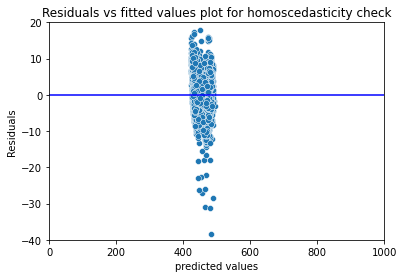

In [44]:
import seaborn as sns
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-40,20)
plt.xlim(0,1000)
p = sns.lineplot([0,1000],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

### It compares variances of two subgroups; one set of high values and one set of low values. If the variances differ, the test rejects the null hypothesis that the variances of the errors are not constant.


### Null Hypothesis: Error terms are homoscedastic

### Alternative Hypothesis: Error terms are heteroscedastic.

In [45]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)

lzip(name, test)

[('F statistic', 1.0022685955908297), ('p-value', 0.47296254635794754)]

### Since p value is more than 0.05 in Goldfeld Quandt Test,
### we can't reject it's null hypothesis that error terms are homoscedastic. Good.

# Normality

## Assumption 4 of linear regression is that the residuals are normally distributed. 

In [69]:
import statsmodels.api as sm
import scipy.stats as stats

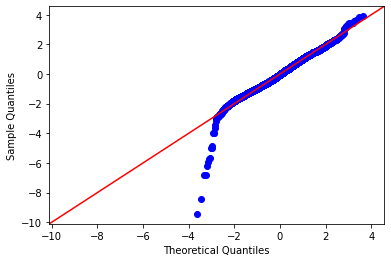

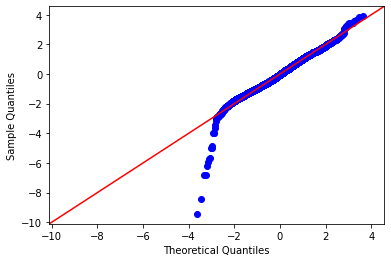

In [66]:
sm.qqplot(residuals,line='45',fit=True,dist=stats.norm)

In [67]:
from scipy import stats
mu, std = stats.norm.fit(model.resid)
mu, std

(-1.1718014147267738e-13, 4.557126016749483)

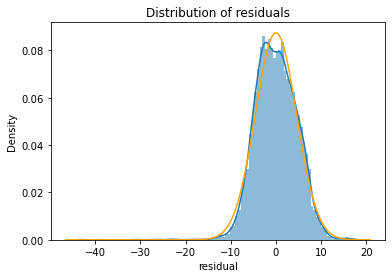

In [68]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig

# plot the residuals
sns.histplot(x=model.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()